In [ ]:
#逻辑回归本质就是最大似然参数估计算法
#似然函数就是交叉熵

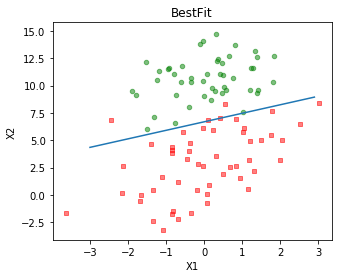

In [7]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np

"""
函数说明:梯度上升算法测试函数
求函数f(x) = -x^2 + 4x的极大值
Parameters:
    无
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-28
"""
def Gradient_Ascent_test():
    def f_prime(x_old):#f(x)的导数
        return -2 * x_old + 4
    x_old = -1#初始值，给一个小于x_new的值
    x_new = 0#梯度上升算法初始值，即从(0,0)开始
    alpha = 0.01#步长，也就是学习速率，控制更新的幅度
    presision = 0.00000001#精度，也就是更新阈值
    while abs(x_new - x_old) > presision:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)#上面提到的公式
    print(x_new)#打印最终求解的极值近似值

"""
函数说明:加载数据
Parameters:
    无
Returns:
    dataMat - 数据列表
    labelMat - 标签列表
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-28
"""
def loadDataSet():
    dataMat = []#创建数据列表
    labelMat = []#创建标签列表
    fr = open('./data/testSet.txt')#打开文件
    for line in fr.readlines():#逐行读取
        lineArr = line.strip().split()#去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])#添加数据
        labelMat.append(int(lineArr[2]))#添加标签
    fr.close()#关闭文件
#     print("dataMat",dataMat)  二维数组
#     print("labelMat",labelMat) 一维数组，标签矩阵
    return dataMat, labelMat#返回

"""
函数说明:sigmoid函数
Parameters:
    inX - 数据
Returns:
    sigmoid函数
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-28
"""
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

"""
函数说明:梯度上升算法
Parameters:
    dataMatIn - 数据集
    classLabels - 数据标签
Returns:
    weights.getA() - 求得的权重数组(最优参数)
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-28
"""
#全批量梯度下降
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)#转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()#转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)#返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001#移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500#最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)#梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()#将矩阵转换为数组，返回权重数组

"""
函数说明:绘制数据集
Parameters:
    无
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-30
"""
def plotDataSet():
    dataMat, labelMat = loadDataSet()#加载数据集
    dataArr = np.array(dataMat)#转换成numpy的array数组
    n = np.shape(dataMat)[0]#数据个数
    xcord1 = []; ycord1 = []#正样本
    xcord2 = []; ycord2 = []#负样本
    for i in range(n):#根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])#1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])#0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)#添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)#绘制负样本
    plt.title('DataSet')#绘制title
    plt.xlabel('X1'); plt.ylabel('X2')#绘制label
    plt.show()#显示

"""
函数说明:绘制数据集
Parameters:
    weights - 权重参数数组
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-08-30
"""
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()#加载数据集
    dataArr = np.array(dataMat)#转换成numpy的array数组
    n = np.shape(dataMat)[0]#数据个数
    xcord1 = []; ycord1 = []#正样本
    xcord2 = []; ycord2 = []#负样本
    for i in range(n):#根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])#1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])#0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)#添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)#绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.rcParams['figure.figsize']=(5.0,4.0)
    plt.title('BestFit')#绘制title
    plt.xlabel('X1'); plt.ylabel('X2')#绘制label
    plt.show()

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()
    weights = gradAscent(dataMat, labelMat)
    plotBestFit(weights)